In [1]:
!git clone https://github.com/sushant097/TSAI-ERAv1-Assignments.git

Cloning into 'TSAI-ERAv1-Assignments'...
remote: Enumerating objects: 1155, done.
remote: Counting objects: 100% (1155/1155), done.
remote: Compressing objects: 100% (156/156), done.
remote: Total 1155 (delta 996), reused 1149 (delta 990), pack-reused 0
Receiving objects: 100% (1155/1155), 10.62 MiB | 19.45 MiB/s, done.
Resolving deltas: 100% (996/996), done.


In [2]:
%cd TSAI-ERAv1-Assignments/subModules/VAE

/kaggle/working/TSAI-ERAv1-Assignments/subModules/VAE


In [3]:
!pip install -r requirements.txt --quiet


In [4]:
!pip install torchsummary --quiet

In [5]:
! pip install git+https://github.com/PytorchLightning/lightning-bolts.git@master --upgrade --quiet


In [6]:
import torch
import pytorch_lightning as pl
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

from config import *
from lightning_model.VAELitModel import VAELitModel
from lightning_datamodule.cifar10 import CIFAR10DataModule

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/pl_bolts/models/self_supervised/amdim/amdim_module.py:34: UnderReviewWarning: The feature generate_power_seq is currently marked under review. The compatibility with other Lightning projects is not guaranteed and API may change at any time. The API and functionality may change without warning in future releases. More details: https://lightning-bolts.readthedocs.io/en/latest/stability.html
  "lr_options": generate_power_seq(LEARNING_RATE_CIFAR, 11),
/opt/conda/lib/python3.10/site-packages/pl_bolts/models/self_supervised/amdim/amdim_module.py:93: UnderReviewWarning: The feature FeatureMapContrastiveTask is currently marked under review. The compatibility with other Lightning projects is not guaranteed a

In [7]:
datamodule = CIFAR10DataModule(
    data_dir=DATA_DIR,
    batch_size=BATCH_SIZE,
    num_workers=NUM_WORKERS
)
vae = VAELitModel()

trainer = pl.Trainer(
    gpus=1,
    max_epochs=25
)
trainer.fit(vae, datamodule)

/kaggle/working/TSAI-ERAv1-Assignments/subModules/VAE/lightning_model/VAELitModel.py:19: UnderReviewWarning: The feature resnet18_encoder is currently marked under review. The compatibility with other Lightning projects is not guaranteed and API may change at any time. The API and functionality may change without warning in future releases. More details: https://lightning-bolts.readthedocs.io/en/latest/stability.html
  self.encoder = resnet18_encoder(False, False)
/opt/conda/lib/python3.10/site-packages/pl_bolts/models/autoencoders/components.py:326: UnderReviewWarning: The feature ResNetEncoder is currently marked under review. The compatibility with other Lightning projects is not guaranteed and API may change at any time. The API and functionality may change without warning in future releases. More details: https://lightning-bolts.readthedocs.io/en/latest/stability.html
  return ResNetEncoder(EncoderBlock, [2, 2, 2, 2], first_conv, maxpool1)
/opt/conda/lib/python3.10/site-packages/p

100%|██████████| 170498071/170498071 [00:04<00:00, 35140044.38it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data/


Training: 0it [00:00, ?it/s]

Epoch: 1 | Loss: 4360.57373046875
Epoch: 2 | Loss: 3758.49365234375
Epoch: 3 | Loss: 3433.36474609375
Epoch: 4 | Loss: 3205.607421875
Epoch: 5 | Loss: 3041.5576171875
Epoch: 6 | Loss: 2902.22802734375
Epoch: 7 | Loss: 2769.406982421875
Epoch: 8 | Loss: 2690.29345703125
Epoch: 9 | Loss: 2629.765869140625
Epoch: 10 | Loss: 2556.599365234375
Epoch: 11 | Loss: 2509.46240234375
Epoch: 12 | Loss: 2485.611328125
Epoch: 13 | Loss: 2455.536865234375
Epoch: 14 | Loss: 2437.969482421875
Epoch: 15 | Loss: 2414.88818359375
Epoch: 16 | Loss: 2399.910400390625
Epoch: 17 | Loss: 2385.089111328125
Epoch: 18 | Loss: 2376.2978515625
Epoch: 19 | Loss: 2356.85205078125
Epoch: 20 | Loss: 2347.478271484375
Epoch: 21 | Loss: 2331.84033203125


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [8]:

test_loader = datamodule.test_dataloader()

dataiter = iter(test_loader)
data_next = next(dataiter)
images, labels = data_next
     

In [9]:

incorrect_labels = []

for i in labels:
    incorrect_label = torch.randint(low=0, high=10, size=(1,)).item()

    while incorrect_label == i:
        incorrect_label = torch.randint(low=0, high=10, size=(1,)).item()

    incorrect_labels.append(incorrect_label)

In [10]:
device = "cpu"

labels_corr = torch.IntTensor(incorrect_labels)
images, labels_corr = images.to(device), labels_corr.to(device)

with torch.no_grad():
    pred = vae((images, labels_corr))

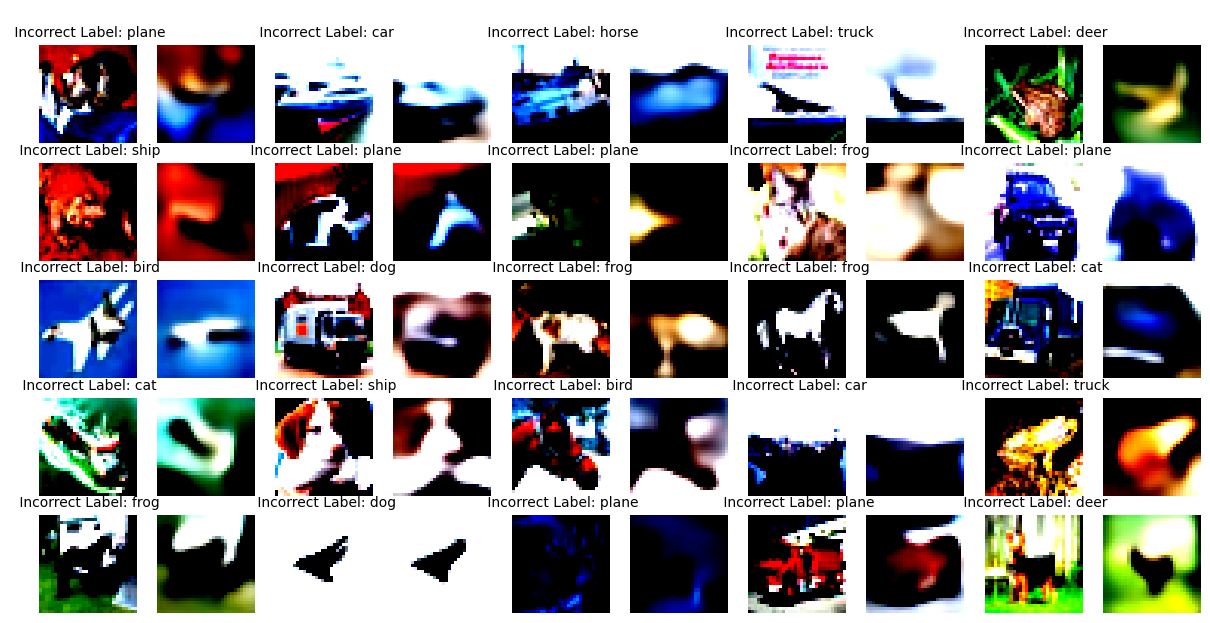

In [11]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

ind = 0
fig = plt.figure(figsize=(15,15))
for i in range(25):
    lbl_corr = labels[i]
    img_corr = images[i]
    img_new = pred[i]
    lbl_new = labels_corr[i]
    ind = ind+1
    ax = fig.add_subplot(10, 10,ind )
    ax.axis("off")
    ax.imshow(np.transpose(img_corr.squeeze(0).cpu().numpy(), (1, 2, 0)))
    ax.set_title(f'\n Incorrect Label: {classes[lbl_new.detach()]}',fontsize=10)
    ind = ind+1
    ax = fig.add_subplot(10, 10, ind)
    ax.axis("off")
    ax.imshow(np.transpose(img_new.squeeze(0).cpu().detach().numpy(), (1, 2, 0)))